In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cs
import plotly
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
plotly.offline.init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df =pd.read_csv("drive/MyDrive/DataScience/Stock/company_stock.csv")
df.isnull().sum()

S.N.                  0
Traded Companies      0
No. Of Transaction    0
Max Price             0
Min Price             0
Closing Price         0
Traded Shares         0
Amount                0
Previous Closing      0
Difference Rs.        0
Date                  0
dtype: int64

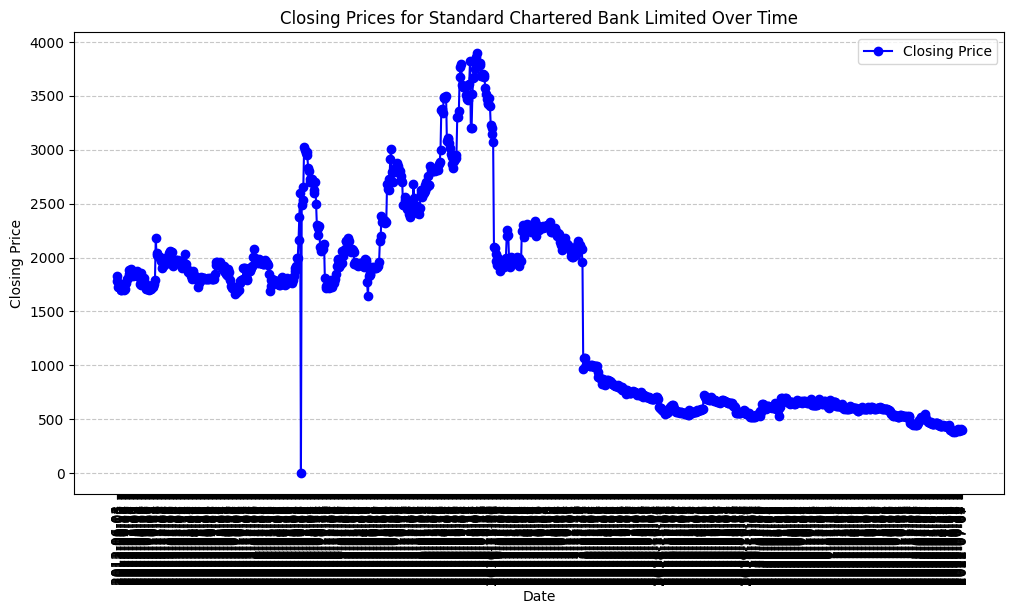

In [ ]:
company_name = 'Standard Chartered Bank Limited'

# Filter the DataFrame for the selected company
company_data = df[df['Traded Companies'] == company_name]

# Sort the data by date
company_data = company_data.sort_values(by='Date')

# Create a line plot to visualize the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(company_data['Date'], company_data['Closing Price'], marker='o', linestyle='-', color='blue', label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'Closing Prices for {company_name} Over Time')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
dft=df.transpose()
dft.rename(columns=dft.iloc[0],inplace= True)
dft=dft[1:]
dft

,1,2,3,4,5,6,7,8,9,10,...,98,99,100,101,102,103,104,105,106,107
Traded Companies,Ace Development Bank Ltd.,Agricultural Development Bank Limited,Arun Valley Hydropower Development Co. Ltd.,Bank of Kathmandu Ltd.,Biratlaxmi Bikas Bank Limited,Bishal Bazar Company Limited,Butwal Power Company Limited,Chhimek Laghubitta Bittiya Sanstha Limited,Chilime Hydropower Company Limited,Citizen Investment Trust,...,Surya Life Insurance Company Limited,Swabalamban Laghubitta Bittiya Sanstha Limited,Synergy Finance Ltd.,Taragaon Regency Hotel Limited,Tinau Development Bank Limited,Tourism Development Bank Limited,Triveni Bikas Bank Limited,Unique Finance Ltd.,United Insurance Co. (Nepal) Ltd.,Western Development Bank Limited
No. Of Transaction,4,68,13,23,1,1,1,1,23,1,...,15,1,1,13,1,6,3,11,4,5
Max Price,118.0,245.0,290.0,677.0,122.0,1650.0,760.0,353.0,1131.0,1420.0,...,409.0,650.0,82.0,210.0,145.0,138.0,262.0,105.0,300.0,120.0
Min Price,115.0,235.0,279.0,651.0,122.0,1650.0,760.0,353.0,1100.0,1420.0,...,393.0,650.0,82.0,194.0,145.0,136.0,252.0,99.0,285.0,117.0
Closing Price,116.0,242.0,290.0,674.0,122.0,1650.0,760.0,353.0,1131.0,1420.0,...,400.0,650.0,82.0,194.0,145.0,136.0,257.0,104.0,295.0,117.0
Traded Shares,267.0,6103.0,715.0,4634.0,200.0,300.0,40.0,2504.0,4138.0,10.0,...,669.0,20.0,68.0,560.0,23.0,2120.0,50.0,340.0,1701.0,1512.0
Amount,30997.0,1444771.0,204471.0,3079880.0,24400.0,495000.0,30400.0,883912.0,4603211.0,14200.0,...,266960.0,13000.0,5576.0,114420.0,3335.0,291040.0,12800.0,35000.0,499785.0,178428.0
Previous Closing,119.0,240.0,289.0,661.0,120.0,1637.0,760.0,360.0,1122.0,1421.0,...,394.0,647.0,81.0,191.0,138.0,137.0,252.0,98.0,292.0,118.0
Difference Rs.,-3.0,2.0,1.0,13.0,2.0,13.0,0.0,-7.0,9.0,-1.0,...,6.0,3.0,1.0,3.0,7.0,-1.0,5.0,6.0,3.0,-1.0
Date,2013-04-01,2013-04-01,2013-04-01,2013-04-01,2013-04-01,2013-04-01,2013-04-01,2013-04-01,2013-04-01,2013-04-01,...,2014-01-08,2014-01-08,2014-01-08,2014-01-08,2014-01-08,2014-01-08,2014-01-08,2014-01-08,2014-01-08,2014-01-08


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have already loaded and preprocessed your data
# Drop non-numeric columns or select relevant numeric columns as features
X = df[['Traded Shares']]  # Replace with your actual features
y = df['Closing Price']  # Replace with your actual target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)

# Evaluate the models
evaluation = {}
for model_name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    evaluation[model_name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

print('Evaluation Results:')
for model_name, metrics in evaluation.items():
    print(f'{model_name}:')
    print(f'MSE: {metrics["MSE"]}')
    print(f'MAE: {metrics["MAE"]}')
    print(f'RMSE: {metrics["RMSE"]}')
    print('---')


Evaluation Results:
Decision Tree:
MSE: 3142151.29040009
MAE: 790.0960315946865
RMSE: 1772.6114324352334
---
Linear Regression:
MSE: 3069630.5461269263
MAE: 727.9479846879333
RMSE: 1752.0361143900334
---
Random Forest:
MSE: 3090087.5783047904
MAE: 771.5441349657613
RMSE: 1757.8644937266326
---


In [ ]:
import graphviz
from sklearn.tree import export_graphviz
import plotly.graph_objs as go

# Generate Decision Tree Visualization
dot_data = export_graphviz(models['Decision Tree'], out_file=None,
                           feature_names=X.columns, filled=True, rounded=True,
                           special_characters=True, max_depth=3)  # Adjust max_depth as needed
graph = graphviz.Source(dot_data)

graph.render(filename='decision_tree', format='png')

# Create the scatter plot
fig = go.Figure()
for model_name, y_pred in predictions.items():
    fig.add_trace(go.Scatter(
        x=y_test.index,
        y=y_pred,
        mode='markers',
        name=model_name
    ))
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='markers',
    name='Actual'
))
fig.update_layout(
    title='Stock Prediction',
    xaxis_title='Data Point',
    yaxis_title='Yield',
)

fig.show(renderer="colab")


Output hidden; open in https://colab.research.google.com to view.

<ipython-input-35-5d6584452e53>:14: FutureWarning:

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



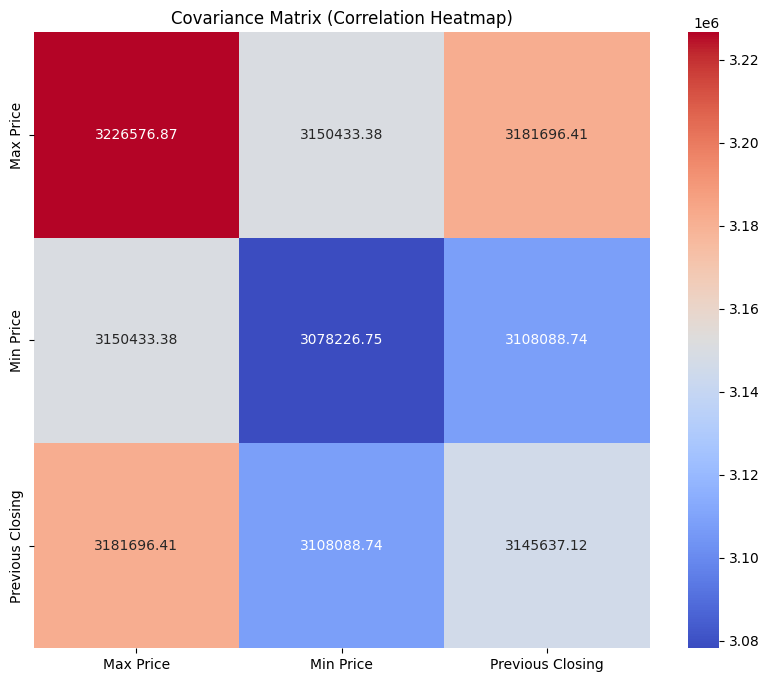

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = "drive/MyDrive/DataScience/Stock/company_stock.csv"
df = pd.read_csv(file_path)

# Assuming to calculate the covariance matrix for the specified columns
selected_columns = ['Date', 'Traded Companies', 'Max Price', 'Min Price', 'Previous Closing']
data = df[selected_columns]

covariance_matrix = data.cov()

# Create a heatmap of the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Covariance Matrix (Correlation Heatmap)')
plt.show()


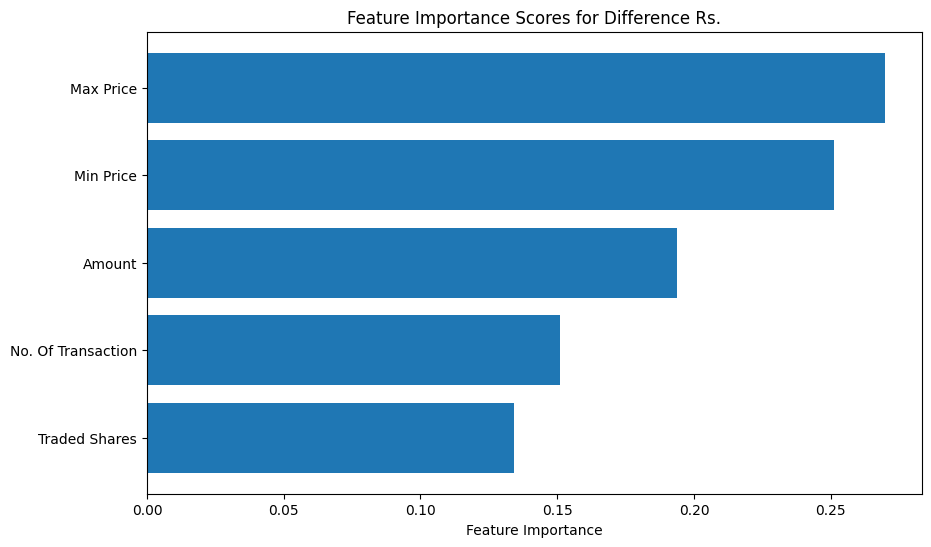

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your stock data (replace 'file_path' with the actual path to your data)
file_path = "drive/MyDrive/DataScience/Stock/company_stock.csv"
df = pd.read_csv(file_path)

# Select the relevant columns for X (features)
selected_columns = ['No. Of Transaction', 'Max Price', 'Min Price', 'Traded Shares', 'Amount']

# Encode categorical column 'Traded Companies' using label encoding
label_encoder = LabelEncoder()
df['Traded Companies'] = label_encoder.fit_transform(df['Traded Companies'])

X = df[selected_columns]

target_column = 'Difference Rs.'
y = df[target_column]


rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)


feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': selected_columns, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title(f'Feature Importance Scores for {target_column}')
plt.gca().invert_yaxis()
plt.show()


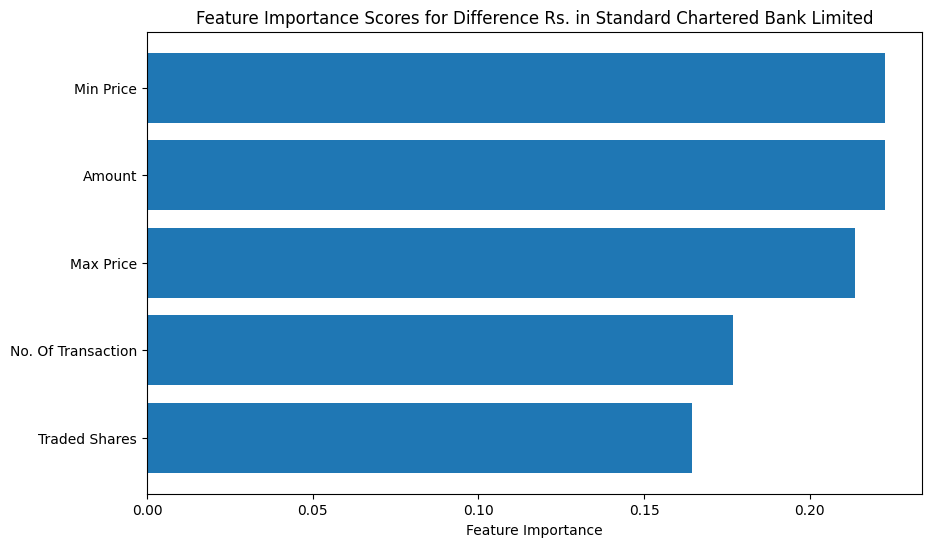

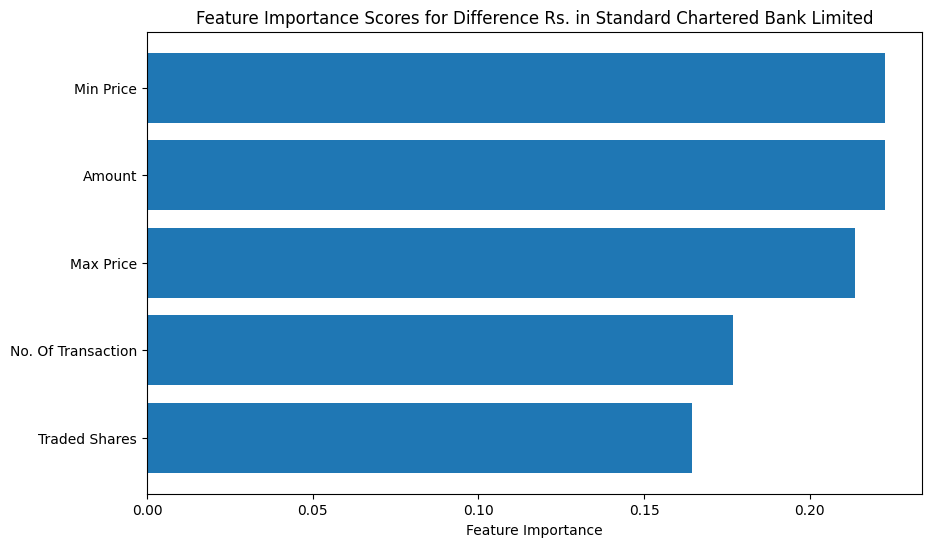

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your stock data (replace 'file_path' with the actual path to your data)
file_path = "drive/MyDrive/DataScience/Stock/company_stock.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame for the selected company (replace 'YourCompany' with the actual company name)
selected_company = 'Standard Chartered Bank Limited'
company_data = df[df['Traded Companies'] == selected_company]

# Select the relevant columns for X (features)
selected_columns = ['No. Of Transaction', 'Max Price', 'Min Price', 'Traded Shares', 'Amount']

# Encode categorical column 'Traded Companies' using label encoding
label_encoder = LabelEncoder()
company_data['Traded Companies'] = label_encoder.fit_transform(company_data['Traded Companies'])

X = company_data[selected_columns]

# Define your target variable (replace 'YourTargetColumn' with the actual target column name)
target_column = 'Difference Rs.'
y = company_data[target_column]

# Train a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': selected_columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title(f'Feature Importance Scores for {target_column} in {selected_company}')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:


# Load your stock data
file_path = "drive/MyDrive/DataScience/Stock/company_stock.csv"
df = pd.read_csv(file_path)

# feature columns and target column
selected_columns = ['No. Of Transaction', 'Max Price', 'Min Price', 'Traded Shares', 'Amount']
X = df[selected_columns]
y = df['Closing Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
])

# Fit and transform the training data
X_train = preprocessing_pipeline.fit_transform(X_train)
# Transform the testing data
X_test = preprocessing_pipeline.transform(X_test)

# Build Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Build Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the number of estimators
rf.fit(X_train, y_train)

# Build Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

# Evaluate model performances
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

lr_mse, lr_mae, lr_r2 = evaluate_model(lr, X_test, y_test)
rf_mse, rf_mae, rf_r2 = evaluate_model(rf, X_test, y_test)
dt_mse, dt_mae, dt_r2 = evaluate_model(dt, X_test, y_test)




In [ ]:
print("Linear Regression:")
print(f"Mean Squared Error: {lr_mse:.4f}")
print(f"Mean Absolute Error: {lr_mae:.4f}")
print(f"R-squared: {lr_r2:.4f}")
print()

print("Random Forest Regressor:")
print(f"Mean Squared Error: {rf_mse:.4f}")
print(f"Mean Absolute Error: {rf_mae:.4f}")
print(f"R-squared: {rf_r2:.4f}")
print()

print("Decision Tree Regressor:")
print(f"Mean Squared Error: {dt_mse:.4f}")
print(f"Mean Absolute Error: {dt_mae:.4f}")
print(f"R-squared: {dt_r2:.4f}")

Linear Regression:
Mean Squared Error: 1384.8923
Mean Absolute Error: 8.6480
R-squared: 0.9996

Random Forest Regressor:
Mean Squared Error: 2853.4573
Mean Absolute Error: 9.7301
R-squared: 0.9991

Decision Tree Regressor:
Mean Squared Error: 11174.3201
Mean Absolute Error: 12.2861
R-squared: 0.9966


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# Load your stock data
file_path = "drive/MyDrive/DataScience/Stock/company_stock.csv"
df = pd.read_csv(file_path)


selected_columns = ['No. Of Transaction', 'Max Price', 'Min Price', 'Traded Shares', 'Amount']
X = df[selected_columns]
y = df['Closing Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])


X_train_numeric = preprocessing_pipeline.fit_transform(X_train)

X_test_numeric = preprocessing_pipeline.transform(X_test)


X_train_numeric = pd.DataFrame(X_train_numeric, columns=X.columns)
X_test_numeric = pd.DataFrame(X_test_numeric, columns=X.columns)

# Build Linear Regression model
lr = LinearRegression()
lr.fit(X_train_numeric, y_train)

# Build Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_numeric, y_train)

# Build Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train_numeric, y_train)


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

lr_mse, lr_mae, lr_r2 = evaluate_model(lr, X_test_numeric, y_test)
rf_mse, rf_mae, rf_r2 = evaluate_model(rf, X_test_numeric, y_test)
dt_mse, dt_mae, dt_r2 = evaluate_model(dt, X_test_numeric, y_test)

print("Linear Regression:")
print(f"Mean Squared Error: {lr_mse:.4f}")
print(f"Mean Absolute Error: {lr_mae:.4f}")
print(f"R-squared: {lr_r2:.4f}")
print()

print("Random Forest Regressor:")
print(f"Mean Squared Error: {rf_mse:.4f}")
print(f"Mean Absolute Error: {rf_mae:.4f}")
print(f"R-squared: {rf_r2:.4f}")
print()

print("Decision Tree Regressor:")
print(f"Mean Squared Error: {dt_mse:.4f}")
print(f"Mean Absolute Error: {dt_mae:.4f}")
print(f"R-squared: {dt_r2:.4f}")


Linear Regression:
Mean Squared Error: 1384.8923
Mean Absolute Error: 8.6480
R-squared: 0.9996

Random Forest Regressor:
Mean Squared Error: 2853.4573
Mean Absolute Error: 9.7301
R-squared: 0.9991

Decision Tree Regressor:
Mean Squared Error: 11174.3201
Mean Absolute Error: 12.2861
R-squared: 0.9966


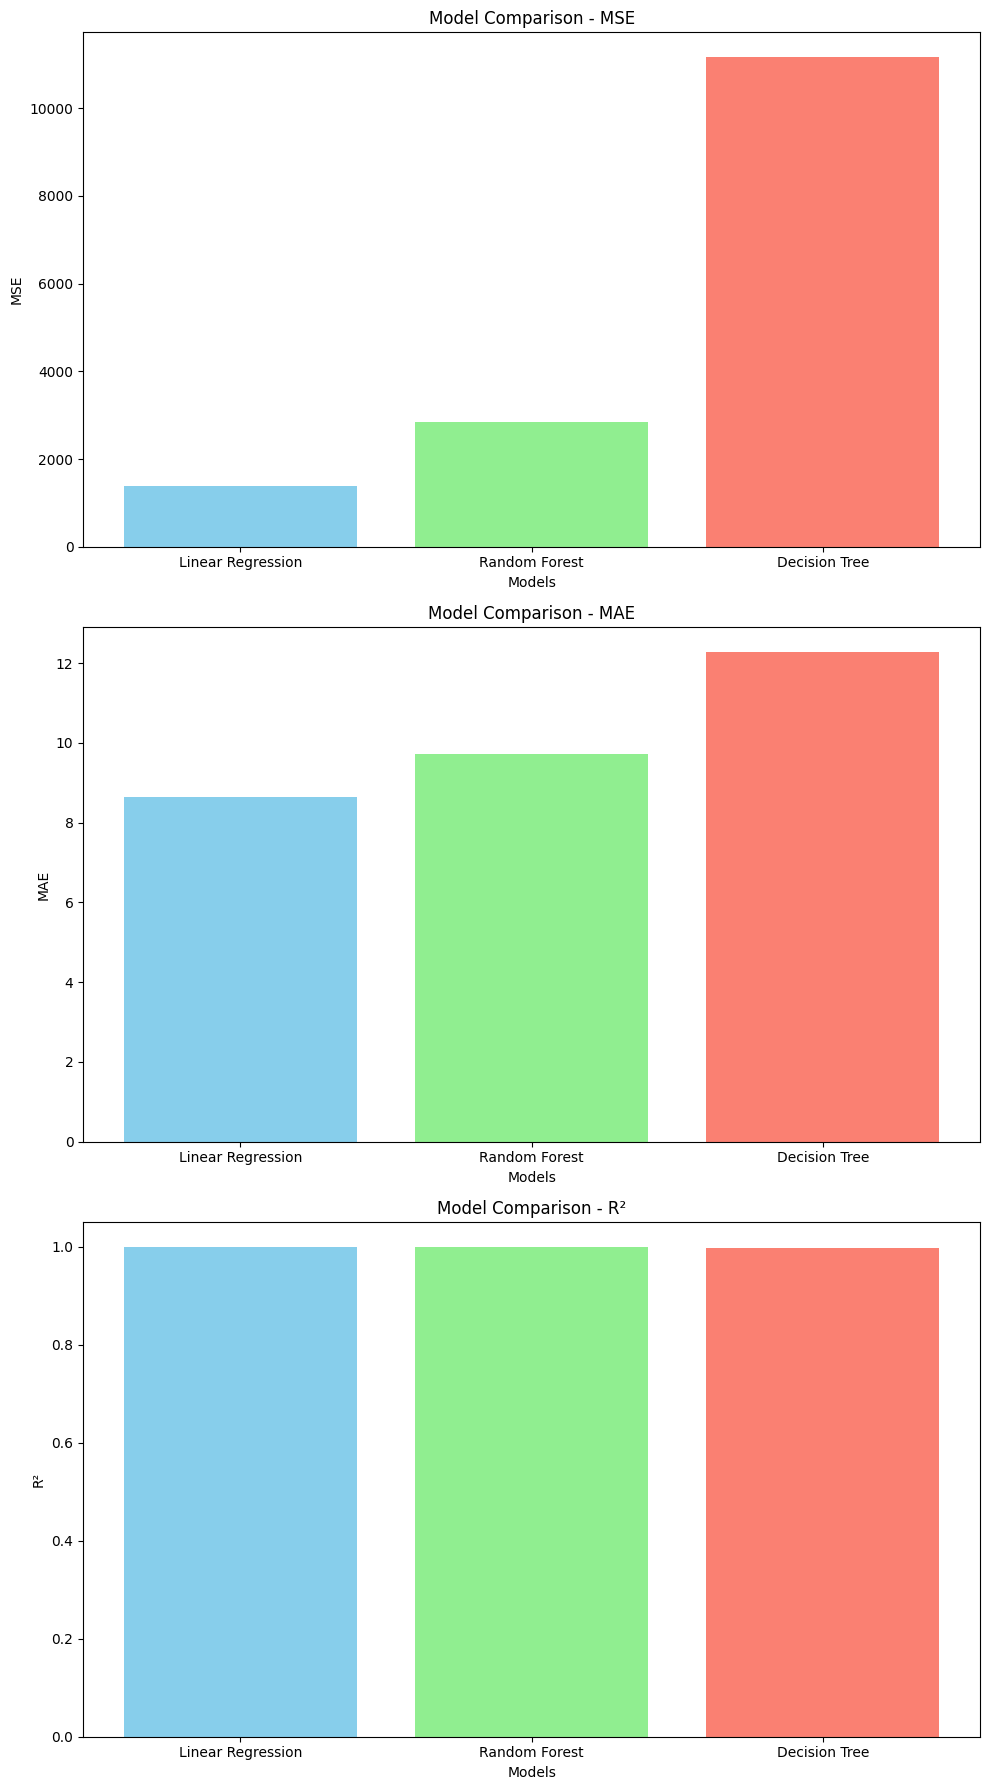

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load your stock data
file_path = "drive/MyDrive/DataScience/Stock/company_stock.csv"
df = pd.read_csv(file_path)

# Feature columns and target column
selected_columns = ['No. Of Transaction', 'Max Price', 'Min Price', 'Traded Shares', 'Amount']
X = df[selected_columns]
y = df['Closing Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
])

# Fit and transform the training data
X_train_numeric = preprocessing_pipeline.fit_transform(X_train)
# Transform the testing data
X_test_numeric = preprocessing_pipeline.transform(X_test)

# Include categorical columns back
X_train_numeric = pd.DataFrame(X_train_numeric, columns=X.columns)
X_test_numeric = pd.DataFrame(X_test_numeric, columns=X.columns)

# Build Linear Regression model
lr = LinearRegression()
lr.fit(X_train_numeric, y_train)

# Build Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_numeric, y_train)

# Build Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train_numeric, y_train)

# Evaluate model performances
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

lr_mse, lr_mae, lr_r2 = evaluate_model(lr, X_test_numeric, y_test)
rf_mse, rf_mae, rf_r2 = evaluate_model(rf, X_test_numeric, y_test)
dt_mse, dt_mae, dt_r2 = evaluate_model(dt, X_test_numeric, y_test)

# Model names and corresponding performance metrics
models = ['Linear Regression', 'Random Forest', 'Decision Tree']
mse_scores = [lr_mse, rf_mse, dt_mse]
mae_scores = [lr_mae, rf_mae, dt_mae]
r2_scores = [lr_r2, rf_r2, dt_r2]

# Create subplots in a single figure
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Create bar graphs for Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²)
for i, (title, scores) in enumerate(zip(['MSE', 'MAE', 'R²'], [mse_scores, mae_scores, r2_scores])):
    axs[i].bar(models, scores, color=['skyblue', 'lightgreen', 'salmon'])
    axs[i].set_xlabel('Models')
    axs[i].set_ylabel(f'{title}')
    axs[i].set_title(f'Model Comparison - {title}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score

# Load your stock data (replace 'file_path' with the actual path to your data)
file_path = "drive/MyDrive/DataScience/Stock/company_stock.csv"
df = pd.read_csv(file_path)

# Define your feature columns and target column
selected_columns = ['No. Of Transaction', 'Max Price', 'Min Price', 'Traded Shares', 'Amount']
X = df[selected_columns]
y = df['Traded Companies']  # Replace 'YourColumn' with the actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# List Hyperparameters to tune
knn = KNeighborsClassifier()
n_neighbors = list(range(15, 25))
p = [1, 2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights=weights, metric=metric)

# Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
best_model = grid_search.fit(X_train, y_train)

# Print the best hyperparameters and F1 score on the test set
print("Best Hyperparameters:")
print(best_model.best_params_)

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score on Test Set: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score

# Load your stock data (replace 'file_path' with the actual path to your data)
file_path = "drive/MyDrive/DataScience/Stock/company_stock.csv"
df = pd.read_csv(file_path)

# Define your feature columns and target column
selected_columns = ['No. Of Transaction', 'Traded Companies','Max Price', 'Min Price', 'Traded Shares', 'Amount']
X = df[selected_columns]
y = df['Traded Companies']  # Replace 'YourColumn' with the actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': list(range(15, 25)),
    'p': [1, 2],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create a K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Create a Repeated Stratified K-Fold cross-validator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Create a GridSearchCV object to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)

# Fit the GridSearchCV object to find the best model
best_model = grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_model.best_params_)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score on Test Set: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best Hyperparameters:
{'metric': 'manhattan', 'n_neighbors': 24, 'p': 1, 'weights': 'distance'}
F1 Score on Test Set: 0.0298


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for stationarity (e.g., using Augmented Dickey-Fuller test)
# If non-stationary, apply differencing to make it stationary

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Fit ARIMA model
p, d, q = 1, 1, 1  # Example values; tune these hyperparameters
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit(disp=0)

# Make predictions
forecast, stderr, conf_int = model_fit.forecast(steps=len(test_data))

# Create a scatter plot of actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.scatter(test_data, forecast, color='blue', alpha=0.7, label='Actual vs. Predicted')
plt.plot([test_data.min(), test_data.max()], [test_data.min(), test_data.max()], linestyle='--', color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Scatter Plot of Actual vs. Predicted Stock Prices')
plt.xlabel('Actual Stock Prices')
plt.ylabel('Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


NameError: ignored